In [4]:
from keras.models import load_model
model = load_model('train_result_model.h5')

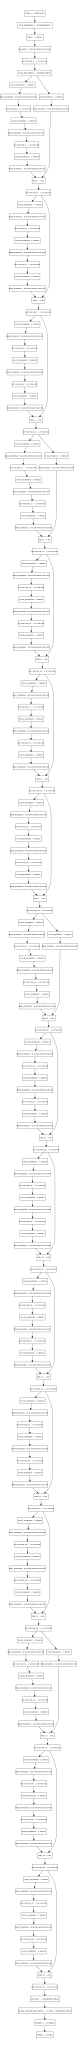

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))


In [6]:
zip([x.name for x in model.layers], range(len(model.layers)))

[(u'input_1', 0),
 (u'zero_padding2d_1', 1),
 (u'conv1', 2),
 (u'bn_conv1', 3),
 (u'activation_1', 4),
 (u'max_pooling2d_1', 5),
 (u'res2a_branch2a', 6),
 (u'bn2a_branch2a', 7),
 (u'activation_2', 8),
 (u'res2a_branch2b', 9),
 (u'bn2a_branch2b', 10),
 (u'activation_3', 11),
 (u'res2a_branch2c', 12),
 (u'res2a_branch1', 13),
 (u'bn2a_branch2c', 14),
 (u'bn2a_branch1', 15),
 (u'add_1', 16),
 (u'activation_4', 17),
 (u'res2b_branch2a', 18),
 (u'bn2b_branch2a', 19),
 (u'activation_5', 20),
 (u'res2b_branch2b', 21),
 (u'bn2b_branch2b', 22),
 (u'activation_6', 23),
 (u'res2b_branch2c', 24),
 (u'bn2b_branch2c', 25),
 (u'add_2', 26),
 (u'activation_7', 27),
 (u'res2c_branch2a', 28),
 (u'bn2c_branch2a', 29),
 (u'activation_8', 30),
 (u'res2c_branch2b', 31),
 (u'bn2c_branch2b', 32),
 (u'activation_9', 33),
 (u'res2c_branch2c', 34),
 (u'bn2c_branch2c', 35),
 (u'add_3', 36),
 (u'activation_10', 37),
 (u'res3a_branch2a', 38),
 (u'bn3a_branch2a', 39),
 (u'activation_11', 40),
 (u'res3a_branch2b', 41

In [7]:
from keras.models import Model
weights = model.layers[177].get_weights()[0]
model2 = Model(model.input, [model.layers[172].output, model.output])

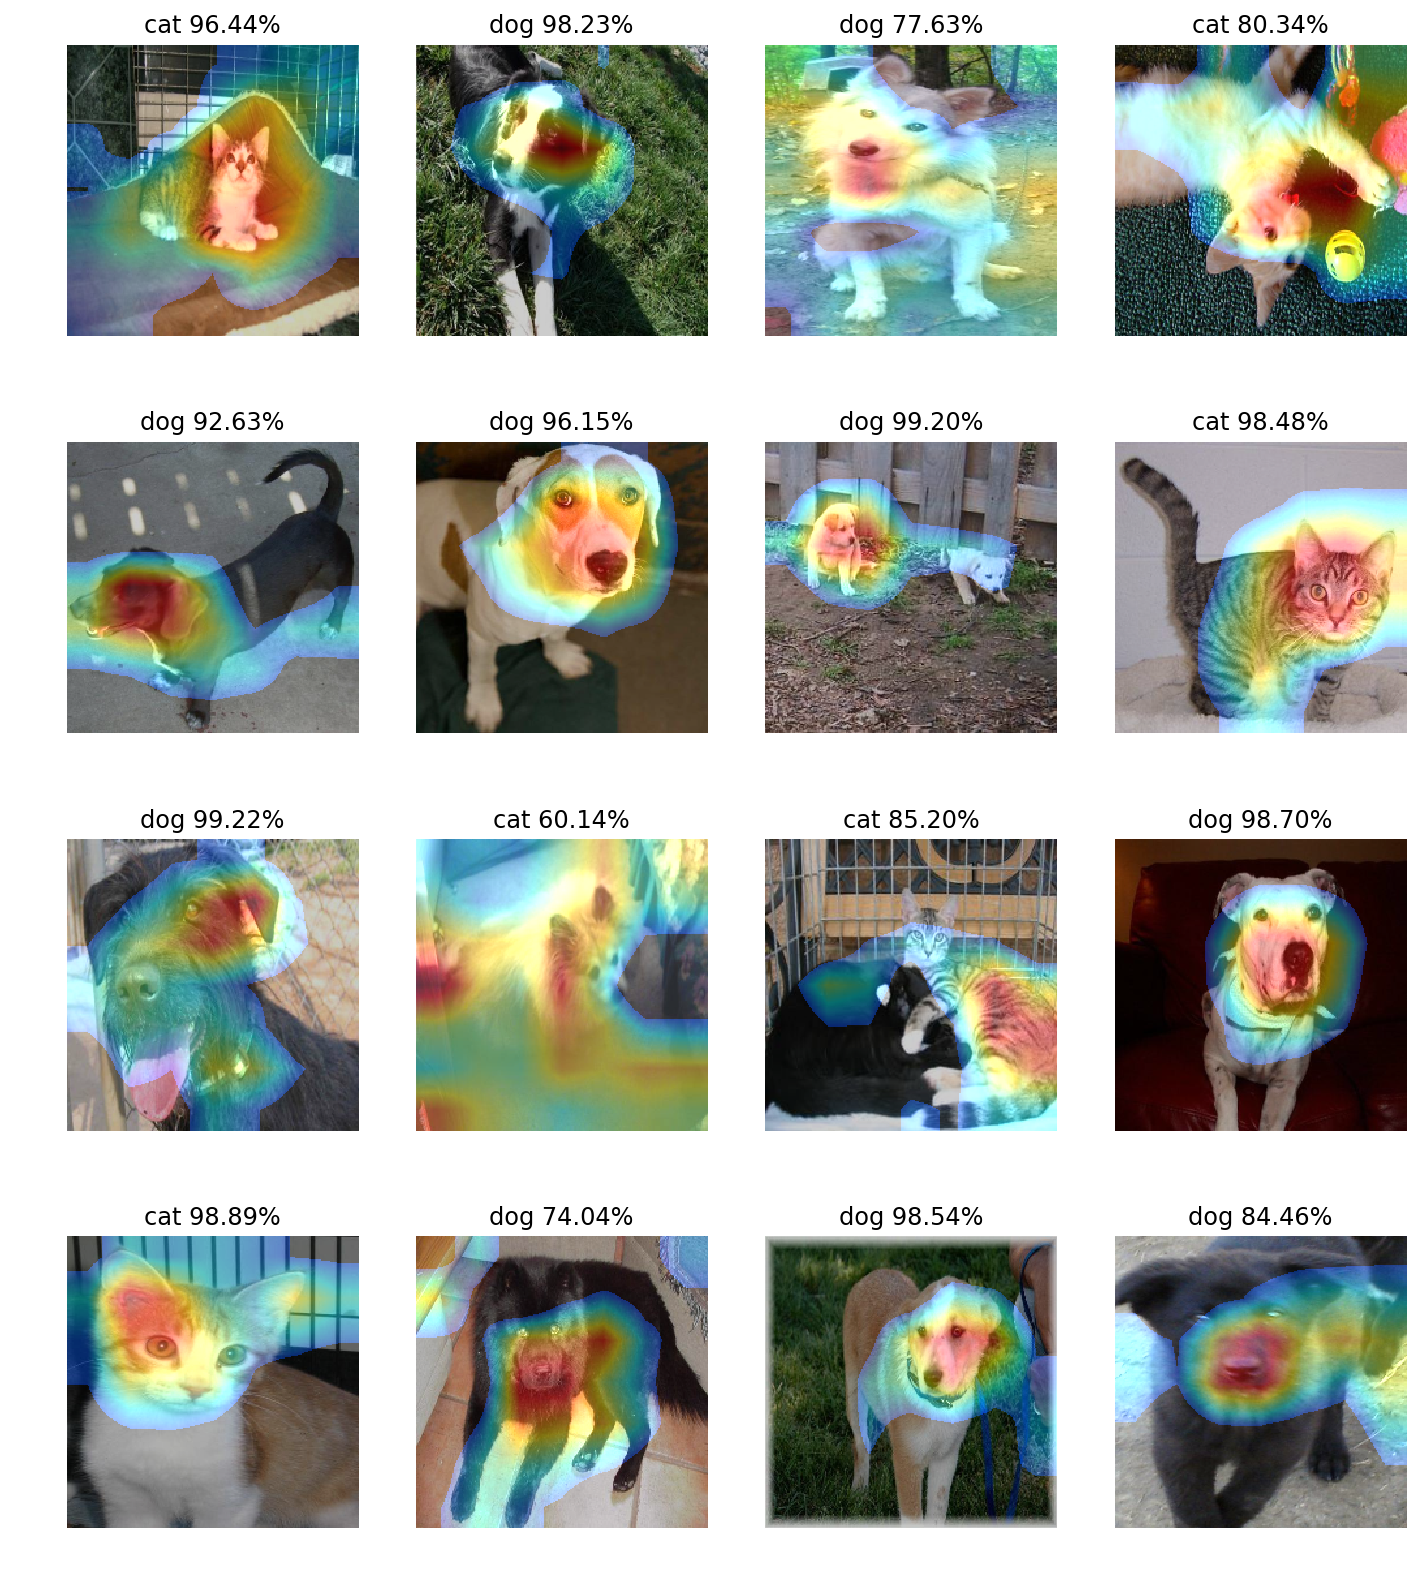

In [8]:
import matplotlib.pyplot as plt
import random
import cv2
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(12, 14))
for i in range(16):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('test/test/%d.jpg' % random.randint(1, 12500))
    img = cv2.resize(img, (224, 224))
    x = img.copy()
    x.astype(np.float32)
    out, prediction = model2.predict(np.expand_dims(x, axis=0))

    prediction = prediction[0]
    out = out[0]

    if prediction < 0.5:
        plt.title('cat %.2f%%' % (100 - prediction*100))
    else:
        plt.title('dog %.2f%%' % (prediction*100))

    cam = (prediction - 0.5) * np.matmul(out, weights)
    cam -= cam.min()
    cam /= cam.max()
    cam -= 0.2
    cam /= 0.8

    cam = cv2.resize(cam, (224, 224))
    heatmap = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_JET)
    heatmap[np.where(cam <= 0.2)] = 0

    out = cv2.addWeighted(img, 0.8, heatmap, 0.4, 0)

    plt.axis('off')
    plt.imshow(out[:,:,::-1])

In [9]:
   """    img = cv2.imread('1.jpg')
    img = cv2.resize(img, (224, 224))
    x = img.copy()
    x.astype(np.float32)
    out, prediction = model2.predict(np.expand_dims(x, axis=0))

    prediction = prediction[0]
    out = out[0]

    if prediction < 0.5:
        plt.title('cat %.2f%%' % (100 - prediction*100))
    else:
        plt.title('dog %.2f%%' % (prediction*100))
    plt.imshow(img)
    """

"    img = cv2.imread('1.jpg')\n img = cv2.resize(img, (224, 224))\n x = img.copy()\n x.astype(np.float32)\n out, prediction = model2.predict(np.expand_dims(x, axis=0))\n\n prediction = prediction[0]\n out = out[0]\n\n if prediction < 0.5:\n     plt.title('cat %.2f%%' % (100 - prediction*100))\n else:\n     plt.title('dog %.2f%%' % (prediction*100))\n plt.imshow(img)\n "

In [10]:
cameraCapture = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_SIMPLEX
while (True):
    success, frame = cameraCapture.read()
    img = cv2.resize(frame, (224, 224))
    x = img.copy()
    x.astype(np.float32)
    out, prediction = model2.predict(np.expand_dims(x, axis=0))
    prediction = prediction[0]
    out = out[0]
    if prediction < 0.5:
        cv2.putText(img, ('cat %.2f%%' % (100 - prediction*100)), (img.shape[0]/2,img.shape[1]/2), font, 0.5,(3,4,255), 2, cv2.CV_AA)
        #print
    else:
        cv2.putText(img, ('dog %.2f%%' % (prediction*100)), (img.shape[0]/2,img.shape[1]/2), font, 0.5,(0,255,0), 2, cv2.CV_AA)
        #print ('dog %.2f%%' % (prediction*100))
    cv2.imshow('my',img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cameraCapture.release()
cv2.destroyAllWindows()